episode 100000.0
episode 

200000.0


episode 300000.0
episode 

400000.0


episode 500000.0
episode 

600000.0


episode 700000.0
episode 

800000.0


episode 900000.0
episode 

1.0e6


episode 1.1e6
episode 

1.2e6


episode 1.3e6
episode 

1.4e6


episode 1.5e6
episode 

1.6e6


episode 1.7e6
episode 

1.8e6


episode 1.9e6
episode 

2.0e6


episode 2.1e6
episode 

2.2e6


episode 2.3e6
episode 

2.4e6


episode 2.5e6
episode 

2.6e6


episode 2.7e6
episode 

2.8e6


episode 2.9e6
episode 

3.0e6


episode 3.1e6
episode 

3.2e6


episode 3.3e6
episode 

3.4e6


episode 3.5e6
episode 

3.6e6


episode 3.7e6
episode 

3.8e6


episode 3.9e6
episode 

4.0e6


episode 4.1e6
episode 

4.2e6


episode 4.3e6
episode 

4.4e6


episode 4.5e6
episode 

4.6e6


episode 4.7e6
episode 

4.8e6


episode 4.9e6
episode 

5.0e6


episode 5.1e6
episode 

5.2e6


episode 5.3e6
episode 

5.4e6


episode 5.5e6
episode 

5.6e6


episode 5.7e6
episode 

5.8e6


episode 5.9e6
episode 

6.0e6


episode 6.1e6
episode 

6.2e6


episode 6.3e6
episode 

6.4e6


episode 6.5e6
episode 

6.6e6


episode 6.7e6
episode 

6.8e6


episode 6.9e6
episode 

7.0e6


episode 7.1e6
episode 

7.2e6


episode 7.3e6
episode 

7.4e6


episode 7.5e6
episode 

7.6e6


episode 7.7e6
episode 

7.8e6


episode 7.9e6
episode 

8.0e6


episode 8.1e6
episode 

8.2e6


episode 8.3e6
episode 

8.4e6


episode 8.5e6
episode 

8.6e6


episode 8.7e6
episode 

8.8e6


episode 8.9e6
episode 

9.0e6


episode 9.1e6
episode 

9.2e6


episode 9.3e6
episode 

9.4e6


episode 9.5e6
episode 

9.6e6


episode 9.7e6
episode 

9.8e6


episode 9.9e6
episode 

1.0e7


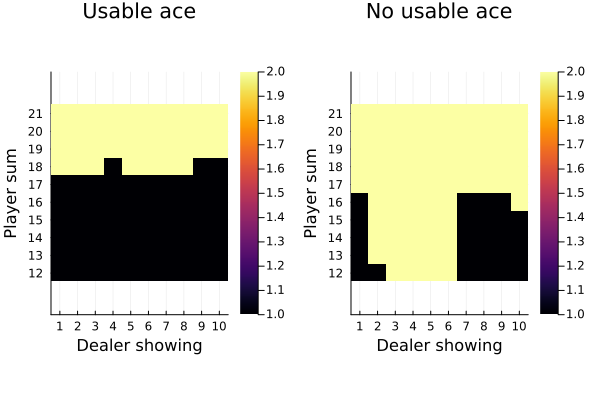

In [6]:
# solving the black jack game described in example 5.1
using Random, StatsBase

# the face values for a suit
# ace through nine, ten, jack, queen, king
# note that 1=ace
suit = vcat(1, collect(2:9), 10, 10, 10, 10)

# a deck of cards consists of four suits: diamonds, clubs, hearts, spades
deck = repeat(suit, 4)
shuffle!(deck)     # a random permutation

# to simulate an infinite deck, we can sample with replacement
deal_cards(n) = sample(deck, n, replace=true)

# note that it's quite possible (in fact it's common) to have more than
# one ace in a hand, but it's not possible to have two "usable" aces.
# 1/2 = no/yes
usable_ace(hand) = (any(hand .== 1) && sum(hand) <= 11) ? 2 : 1

score(hand) = sum(hand) + (usable_ace(hand)==2 ? 10 : 0)

# simulate an episode of blackjack according to policy π
function blackjack(π, ϵ = 0.05)

    # THIS FUNCTION IS INCOMPLETE.
     # Deal 2 cards to player and 2 cards to dealer
     player_hand = deal_cards(2)
     dealer_hand = deal_cards(2)
 
     # Player's turn
     action = 1
     while score(player_hand) < 12
         # Deal another card to the player
         #push!(player_hand, deal_cards(1))
         append!(player_hand, deal_cards(1))
     end
 
     # Initialize data structures to store states visited and actions taken
     states = [[score(player_hand), dealer_hand[2], usable_ace(player_hand)]]
     actions = []
     #push!(states, (score(player_hand), score(dealer_hand), action))
 
     # Check for natural
     if score(player_hand) == 21 
         # Player has a natural
         action = 2  # Stick
         append!(actions, 2)
 
         if score(dealer_hand) == 21 
             return states, actions, 0.0  # Push, no one wins
         else
             return states, actions, 1.0  # Player wins with a natural
         end
     end
 
     # Player's turn
     while true
        i = usable_ace(player_hand)
        action = π[score(player_hand) - 11, dealer_hand[2], i]

        #println("States: ", states)
        #println("Actions: ", actions)
 
         # If epsilon-greedy, change action to the other action
         if rand() < ϵ
             action = 3 - action
         end
 
         #push!(actions, action)

         #append!(actions, action)
 
         if action == 2  # Stick
             #push!(actions, action)
             append!(actions, 2)
             
             ##append!(states, (score(player_hand), dealer_hand[2], usable_ace(player_hand)))
             break
         else  # Hit
             # Deal another card to the player
             #push!(actions, action)
             append!(actions, 1)
             #push!(player_hand, deal_cards(1)[1])
             append!(player_hand, deal_cards(1))
 
             if score(player_hand) > 21
                 return states, actions, -1.0  # Player went bust
             else
                 # Append new state onto the list of states
                 ##push!(states, score(player_hand), score(dealer_hand), action)
                 push!(states, [score(player_hand), dealer_hand[2], usable_ace(player_hand)])
                 ##append!(states, score(player_hand), dealer_hand[2], usable_ace(player_hand))
             end
         end
     end
 
     # Dealer's turn
     while score(dealer_hand) < 17
         # Deal another card to the dealer
         #push!(dealer_hand, deal_cards(1)[1])
         append!(dealer_hand, deal_cards(1))
     end
 
     # Determine the reward 'r'
     if score(dealer_hand) > 21 || score(player_hand) > score(dealer_hand)
         r = 1.0
     elseif score(player_hand) < score(dealer_hand)
         r = -1.0
     else
         r = 0.0
     end
 
     return states, actions, r

    
    
end

# this is on-policy every-visit MC control because we do not check for
# 1st visits to states; however, for the game of blackjack, it's not
# possible to visit the same state twice in an episode. you could have
# an ace being counted as 11, and then later being counted as 1, but
# the indicator for a usable ace is part of the state.  also, note
# that we maintain exploration of nonoptimal actions in the function
# blackjack().
function MC!(q, qn, π)
    for i = 1:10e6
        i % 100000 == 0 && println("episode ", i)
        states, actions, r = blackjack(π)
        @assert(length(states) == length(actions))
        @assert( r in [-1.0, 0.0, 1.0])
        T = length(states)
        for t = 1:T
            # since this is every-visit MC, the reward at the end
            # of the episode is the return for each state visited, and
            # there is no discounting, the direction of iteration over
            # the episode should not matter.
            
            # THIS FUNCTION IS INCOMPLETE.
            pl = states[t][1] - 11
            de = states[t][2]
            us = states[t][3]
            ac = actions[t]

            qn[pl, de, us, ac] += 1
            q[pl, de, us, ac] += (r - q[pl, de, us, ac]) / qn[pl, de, us, ac]

            allidx = findall(q[pl, de, us, :] .== maximum(q[pl, de, us, :]))
            @assert(allidx in [ [1], [2], [1,2] ])
            if length(allidx) > 1
                idx = sample(allidx, 1)[1]
            else
                idx = allidx[1]
            end
             π[pl, de, us] = idx
            # the steps below need to be completed.
            
            # obtain the state s and action  a for play t

            # update qn

            # update q (this is an incremental update)

            # find the action that maxmizes q for state s

            # update the policy
        end
    end
end

# the state space consists of
# the player's sum 12:21,
# the dealer's showing card 1:10,
# and indicator for usable ace no/yes=1/2
# for a total of 200 possible states.
# the action is hit/stick=1/2

# the initial policy is to stick when the player's sum is 20 or 21, otherwise hit

π = fill(1, (10, 10, 2))
π[9:10,:,:] .= 2           # stick when sum is 20 or 21
q = zeros(10, 10, 2, 2)    # q(state=(player,dealer,usable), action)
qn = zeros(10, 10, 2, 2)   # to hold the number of observations

MC!(q, qn, π)

using Plots
player_string = [string(i) for i = 12:21]  
dealer_string = [string(i) for i = 1:10]

# julia stores matrices in column-major order
# note:
# x = [ 1 2 3; 4 5 6 ]
# x[:]
# is stored as 1 4 2 5 3 6

# plot the optimal policy
z = π[:,:,2]
pl1 = heatmap(dealer_string, player_string, z,
              aspect_ratio=1,
              xlabel="Dealer showing",
              ylabel="Player sum",
              title="Usable ace",
              fmt=:png)
z = π[:,:,1]
pl2 = heatmap(dealer_string, player_string, z,
              aspect_ratio=1,
              xlabel="Dealer showing",
              ylabel="Player sum",
              title="No usable ace",
              fmt=:png)
plot(pl1,pl2)
# obtain the state-value function v from the action-value function q
# v = zeros(10, 10, 2)
# for pl = 1:size(q)[1]
#     for de = 1:size(q)[2]
#         for us = 1:size(q)[3]
#             v[pl,de,us] = findmax(q[pl,de,us,:])[1]
#         end
#     end
# end
# # plot the state-value function
# pl3 = surface(dealer_string, player_string, v[:,:,2],
#               xlabel = "Dealer showing",
#               ylabel = "Player sum",
#               title = "Usable ace",
#               zlims = (-1.0,1.0))
# pl4 = surface(dealer_string, player_string, v[:,:,1],
#               xlabel = "Dealer showing",
#               ylabel = "Player sum",
#               title = "No usable ace",
#               zlims = (-1.0,1.0))
# plot(pl3,pl4)



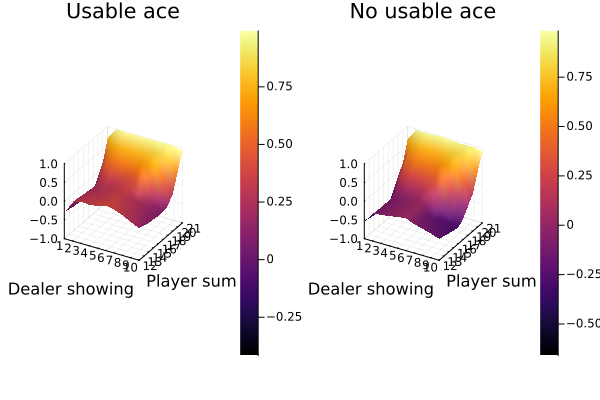

In [7]:
v = zeros(10, 10, 2)
for pl = 1:size(q)[1]
    for de = 1:size(q)[2]
        for us = 1:size(q)[3]
            v[pl,de,us] = findmax(q[pl,de,us,:])[1]
        end
    end
end
# plot the state-value function
pl3 = surface(dealer_string, player_string, v[:,:,2],
              xlabel = "Dealer showing",
              ylabel = "Player sum",
              title = "Usable ace",
              zlims = (-1.0,1.0))
pl4 = surface(dealer_string, player_string, v[:,:,1],
              xlabel = "Dealer showing",
              ylabel = "Player sum",
              title = "No usable ace",
              zlims = (-1.0,1.0))
plot(pl3,pl4)

In [8]:
println("This code demonstrates an on-policy every-visit Monte Carlo control algorithm to learn the optimal policy for the Blackjack game,")
println("and it visualizes the learned policy using heatmaps.The learning process involves simulating many episodes")
println("and updating the action-value function and policy accordingly.")

This code demonstrates an on-policy every-visit Monte Carlo control algorithm to learn the optimal policy for the Blackjack game,
and it visualizes the learned policy using heatmaps.The learning process involves simulating many episodes
and updating the action-value function and policy accordingly.
